 CS672 – Introduction to Deep Learning 
 Project 3



In [ ]:
# import  libraries

import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import pathlib
import cv2
import random
from shutil import copyfile

import warnings
warnings.filterwarnings('ignore')
  
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
# from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

import os
import matplotlib.image as mpimg
warnings.filterwarnings('ignore')

####  Data preprocessing and uploading

In [ ]:
# Extract zip file - kagglecatsanddogs_5340.zip
_URL = 'https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

zip_dir

'/root/.keras/datasets/cats_and_dogs.zip'

In [ ]:
!unzip /root/.keras/datasets/cats_and_dogs.zip;

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [ ]:
dest = 'PetImages'

In [ ]:
source_path = 'PetImages/Dog'

# check no of images in dog folder
print(f"There are {len(os.listdir(source_path))} images.")

There are 12501 images.


In [ ]:

# Deletes all non-image files (there are two .db files bundled into the dataset)
!find PetImages/Dog -type f ! -name "*.jpg" -exec rm {} +


In [ ]:
!find PetImages/Cat -type f ! -name "*.jpg" -exec rm {} +

In [ ]:
# check no of images in dog folder after removing non jpg files

print(f"There are {len(os.listdir(source_path))} images")

There are 12500 images


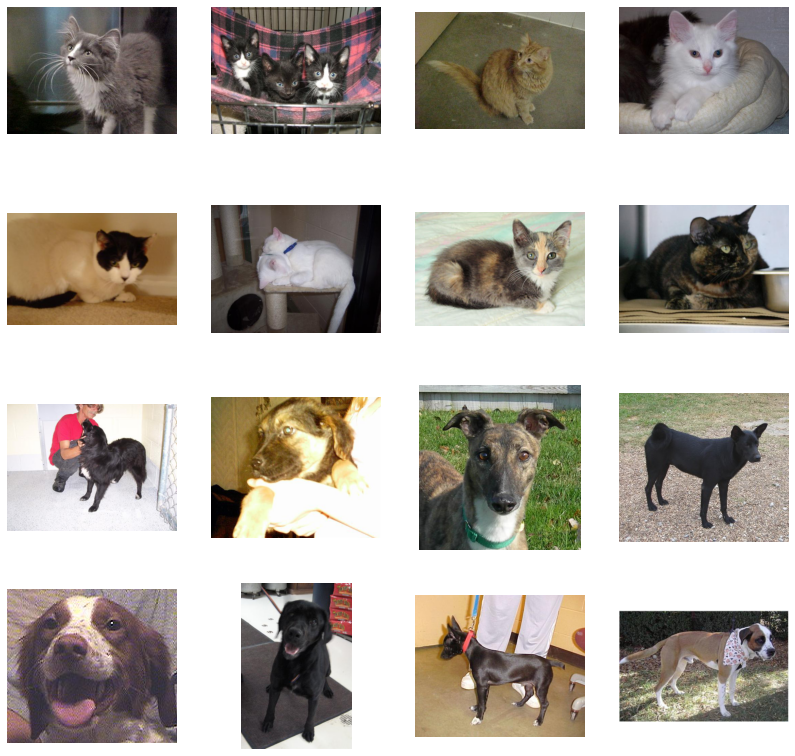

In [ ]:
# Check for images

fig = plt.gcf()
fig.set_size_inches(14, 14)

cat_dir = os.path.join('PetImages/Cat')
dog_dir = os.path.join('PetImages/Dog')
cats = os.listdir(cat_dir)
dogs = os.listdir(dog_dir)

pic_index = 220

cat_pictures = [os.path.join(cat_dir, fname)
              for fname in cats[pic_index-8:pic_index]]
dog_pictures = [os.path.join(dog_dir, fname)
              for fname in dogs[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_pictures + dog_pictures):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [ ]:
# Define root directory
# creating training and validation directories

root_path = 'PetImages'

train_dir = os.path.join(root_path, 'training')
os.makedirs(train_dir, 493 )
validation_dir = os.path.join(root_path, 'validation')
os.makedirs(validation_dir, 493)
train_cats_dir = os.path.join(train_dir, 'cats')
os.makedirs(train_cats_dir, 493)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.makedirs(train_dogs_dir, 493)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.makedirs(validation_cats_dir, 493)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.makedirs(validation_dogs_dir, 493)

In [ ]:
# Function to check for valid size of image
#and split data into training and validation

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    
    length = len([name for name in os.listdir(SOURCE_DIR)])
    newlength = int(length*SPLIT_SIZE)
    count = 1
    randomshuffle = random.sample([name for name in os.listdir(SOURCE_DIR)], length)
    for file in randomshuffle:
        size = os.path.getsize((os.path.join(SOURCE_DIR, file)))
        if(size>0):
            if(count<=newlength):
                copyfile((os.path.join(SOURCE_DIR, file)), (os.path.join(TRAINING_DIR, file)))
            else:
                copyfile((os.path.join(SOURCE_DIR, file)), (os.path.join(VALIDATION_DIR, file)))
        else:
            print(file+" is zero length, so ignoring.")
        count=count+1

In [ ]:
# Defining paths
CAT_SOURCE_DIR = "PetImages/Cat"
DOG_SOURCE_DIR = "PetImages/Dog"

TRAINING_DIR = "PetImages/training/"
VALIDATION_DIR = "PetImages/validation/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

# Empty directories (if run cell multiple times)
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
    for file in os.scandir(TRAINING_CATS_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
    for file in os.scandir(TRAINING_DOGS_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
    for file in os.scandir(VALIDATION_CATS_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
    for file in os.scandir(VALIDATION_DOGS_DIR):
        os.remove(file.path)

# Define proportion of images used for training
split_size = .8

# check for zero length images should be printed out and then added to training and validation folder
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Check that the number of images 
print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")


666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


Original cat's directory has 12500 images
Original dog's directory has 12500 images

There are 9999 images of cats for training
There are 9999 images of dogs for training
There are 2500 images of cats for validation
There are 2500 images of dogs for validation


In [ ]:
# Creates the training and validation data generators


# Instantiate the ImageDataGenerator class 
train_datagen = ImageDataGenerator(rescale=1/255)

# Pass in the appropiate arguments to the flow_from_directory method
train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))

# Instantiate the ImageDataGenerator class
validation_datagen = ImageDataGenerator(rescale=1/255)

# Pass in the appropiate arguments to the flow_from_directory method
validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                            batch_size=20,
                                                            class_mode='binary',
                                                            target_size=(150, 150))


Found 19998 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
### 1. A Keras Sequential model with multiple Convolution and MaxPooling layers

#### CNN image classifier

In [ ]:
sequential_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:

sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:

sequential_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
def plot_accuracy(model_history):
    
    acc = model_history.history['accuracy']
    val_acc = model_history.history['val_accuracy']
    loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, '--', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')

    plt.figure()

    plt.plot(epochs, loss, '--', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

#### Changes in the CNN sequential Model

In [ ]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2), # moderate or small-sized images
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), # Removed one layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid') #2 output layers
])


In [ ]:
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 73, 73, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:

cnn_model_history = cnn_pretained_model.fit(
      train_generator,
      steps_per_epoch=50,  # batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      verbose=2
)

Epoch 1/20
50/50 - 37s - loss: 0.3628 - accuracy: 0.8230 - val_loss: 0.4090 - val_accuracy: 0.8148 - 37s/epoch - 744ms/step
Epoch 2/20
50/50 - 38s - loss: 0.3545 - accuracy: 0.8350 - val_loss: 0.4255 - val_accuracy: 0.8070 - 38s/epoch - 758ms/step
Epoch 3/20
50/50 - 37s - loss: 0.3084 - accuracy: 0.8770 - val_loss: 0.4744 - val_accuracy: 0.7888 - 37s/epoch - 735ms/step
Epoch 4/20
50/50 - 36s - loss: 0.3052 - accuracy: 0.8590 - val_loss: 0.4072 - val_accuracy: 0.8226 - 36s/epoch - 717ms/step
Epoch 5/20
50/50 - 36s - loss: 0.3412 - accuracy: 0.8560 - val_loss: 0.4032 - val_accuracy: 0.8156 - 36s/epoch - 725ms/step
Epoch 6/20
50/50 - 36s - loss: 0.3506 - accuracy: 0.8320 - val_loss: 0.3901 - val_accuracy: 0.8300 - 36s/epoch - 710ms/step
Epoch 7/20
50/50 - 36s - loss: 0.3160 - accuracy: 0.8660 - val_loss: 0.3865 - val_accuracy: 0.8282 - 36s/epoch - 711ms/step
Epoch 8/20
50/50 - 35s - loss: 0.3219 - accuracy: 0.8640 - val_loss: 0.3827 - val_accuracy: 0.8324 - 35s/epoch - 692ms/step
Epoch 9/

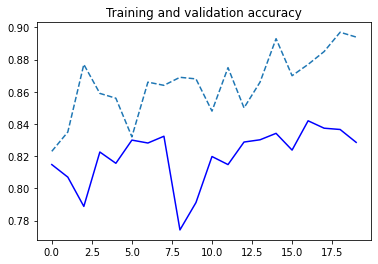

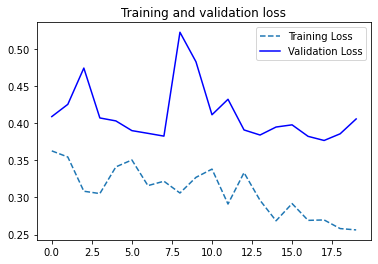

In [ ]:
plot_accuracy(cnn_model_history)

 InceptionV3 model.

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_14 (Conv2D)             (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_14[0][0]']              
 alization)                                                                                       
                                                                                       

In [ ]:
inceptionV3_weights_file = 'inception_v3_weights.h5'
print(type(inceptionV3_weights_file))

print('/n',inceptionV3_weights_file)

<class 'str'>
/n inception_v3_weights.h5


In [ ]:
pre_trained_model.load_weights(inceptionV3_weights_file)

In [ ]:
loaded_weights = pre_trained_model.get_weights()

In [ ]:

len(pre_trained_model.layers)

311

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)

# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

# Adding dropout rate of 0.2
# The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, 
# which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that 
# the sum over all inputs is unchanged.
x = layers.Dropout(0.2)(x) # 20% nodes


In [ ]:
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

model = Model(pre_trained_model.input, x) 

In [ ]:
model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_14 (Conv2D)             (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_14[0][0]']              
 alization)                                                                                       
                                                                                            

In [ ]:


model_history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 50,
            epochs = 20,
            validation_steps = 50,
            verbose = 2
)


Epoch 1/20
50/50 - 51s - loss: 0.3673 - acc: 0.9150 - val_loss: 0.3681 - val_acc: 0.9350 - 51s/epoch - 1s/step
Epoch 2/20
50/50 - 47s - loss: 0.1557 - acc: 0.9520 - val_loss: 0.2102 - val_acc: 0.9590 - 47s/epoch - 938ms/step
Epoch 3/20
50/50 - 47s - loss: 0.1171 - acc: 0.9540 - val_loss: 0.3435 - val_acc: 0.9620 - 47s/epoch - 933ms/step
Epoch 4/20
50/50 - 46s - loss: 0.1252 - acc: 0.9570 - val_loss: 0.1931 - val_acc: 0.9740 - 46s/epoch - 918ms/step
Epoch 5/20
50/50 - 48s - loss: 0.0908 - acc: 0.9650 - val_loss: 0.3731 - val_acc: 0.9700 - 48s/epoch - 953ms/step
Epoch 6/20
50/50 - 47s - loss: 0.2092 - acc: 0.9650 - val_loss: 0.3676 - val_acc: 0.9560 - 47s/epoch - 949ms/step
Epoch 7/20
50/50 - 50s - loss: 0.0971 - acc: 0.9690 - val_loss: 0.3782 - val_acc: 0.9660 - 50s/epoch - 995ms/step
Epoch 8/20
50/50 - 47s - loss: 0.1003 - acc: 0.9690 - val_loss: 0.3361 - val_acc: 0.9660 - 47s/epoch - 931ms/step
Epoch 9/20
50/50 - 50s - loss: 0.0773 - acc: 0.9760 - val_loss: 0.3880 - val_acc: 0.9670 - 

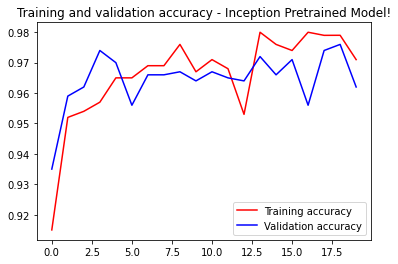

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy - Inception Pretrained Model!')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
# Save trained weight    

model.save_weights('inceptionV3_cat_dog_final.h5')

In [ ]:
#*************************************************************END******************************************************************************